# Konten 

1. Proyek Overview
2. Tujuan Proyek
3. Import library dan data
4. Praproses data
   - 4.1 Missing value
   - 4.2 Duplicates
   - 4.3 Data type
   - 4.4 Writing standard
5. Eksplorasi data analisis
    - 5.1 Purchase
    - 5.2 Revenue
    - 5.3 Loyalty Program
    - 5.4 Shop 
    - 5.5 Item
6. Hypothesis testing
7. Kesimpulan
8. Rekomendasi

# Proyek Overview

Dalam proyek ini saya bekerja sebagai analis junior di toko ritel bahan bangunan yang dikenal sebagai 'Home World'. Analisis ini dimaksudkan untuk memberikan informasi kepada pengelola toko, pemilik dan investor mengenai kinerja toko. Lebih lanjut berdasarkan informasi tersebut akan diberikan beberapa rekomendasi mengenai apa yang dapat dilakukan untuk mengatasi permasalahan yang dihadapi atau bahkan menciptakan peluang pembangunan.

Dataset yang tersedia berisi data tentang pembelian yang dilakukan di retailer atau retailer bahan bangunan “Home World”. Bisnis mengklasifikasikan pelanggannya berdasarkan kartu loyalitas. Selain itu, pelanggan dapat menjadi anggota program loyalitas toko dengan biaya $20 per bulan. Keuntungan yang akan diterima anggota antara lain diskon, informasi penawaran khusus terlebih dahulu, dan banyak hadiah.

Ada dua set data yang disediakan retail_dataset_us dan product_codes_us.

retail_dataset_us.csv berisi:

- purchaseId — ID pembelian pelanggan
- item_ID — ID produk
- tanggal pembelian — tanggal pembelian pelanggan
- Kuantitas — jumlah item yang dibeli
- CustomerID — ID akun pelanggan
- ShopID — ID toko
- program_loyalitas — apakah pelanggan adalah anggota program loyalitas. '0' berarti program non anggota dan '1' berarti program loyalitas

product_codes_us.csv berisi:

- ID Produk
- price_per_one — biaya produk per satu

# Tujuan Proyek


- kategori : purchase 
1. cek frekuensi pemebelian hari, bulan, tahun 
2. cek rata-rata pembelian per hari
3. cek quantity pembelian hari, bulan, tahun
4. cek rata-rata quantity per hari
5. cek user unik pembelian hari, bulan, tahun
6. cek rata-rata berapa user unik dalam 1 hari
- kategori : revenue 
1. revenue harian 
2. revenue bulan 
3. revenue tahun 
- kategori : program loyalitas 
1. cek customer id unik member dan non 
2. pendapatan bisnis dari member dan non hari bulan tahun
3. distribusi frekuensi member dan non member  
4. distribusi volume member dan non member  
- kategori : shop 
1. perbandingan total pendapatan antar toko
2. rata rata pendapatan per transaksi
3. perbandingan frekuensi aktivitas membeli antar toko
4. analisa efektivitas program loyalitas mempertahankan konsumen
5. rata rata jumlah pembelian per transaksi 
- kategori : item 
1. Rata rata jumlah item yang dibeli berdasarkan loyalty program
2. Item yang paling banyak terjual
3. Rata-rata harga per item untuk setiap toko

# Import Library

In [120]:
import pandas as pd 
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from scipy import stats as st
import math as mth
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Import Data

In [121]:
df_retail = pd.read_csv("D:\Data Tiwi\Data Analyst Tripleten\Sprint 13\data_retail.csv", sep=';')
df_retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,10/12/2016 12:50,18427.0,0,Shop 3
1,538862,22195,0,14/12/2016 14:11,22389.0,1,Shop 2
2,538855,21239,7,14/12/2016 13:50,22182.0,1,Shop 3
3,543543,22271,0,09/02/2017 15:33,23522.0,1,Shop 28
4,543812,79321,0,13/02/2017 14:40,23151.0,1,Shop 28


In [122]:
df_product = pd.read_csv("D:\Data Tiwi\Data Analyst Tripleten\Sprint 13\product_codes_us.csv", sep=';')
df_product.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


# Data Explor - Retail

In [123]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [124]:
#cek nilai hilang 
df_retail.isna().sum()

purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
loyalty_program        0
ShopID                 0
dtype: int64

In [125]:
#cek duplikasi 
df_retail.duplicated().sum()

1033

dikethaui 
- data terdiri dari 105335 baris dengan 7 kolom 
- penulisan nama kolom tidak sesuai 
- tipe kolom yang memuat tanggal tidak sesuai 
- terdapat missing value pada kolom customer id 
- terdapat 1033 baris duplikasi 

In [126]:
#perbaikan nama kolom 
df_retail.columns = ['purchase_id','item_id','quantity','purchase_date','customer_id','loyalty_program','shop_id']
df_retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,10/12/2016 12:50,18427.0,0,Shop 3
1,538862,22195,0,14/12/2016 14:11,22389.0,1,Shop 2
2,538855,21239,7,14/12/2016 13:50,22182.0,1,Shop 3
3,543543,22271,0,09/02/2017 15:33,23522.0,1,Shop 28
4,543812,79321,0,13/02/2017 14:40,23151.0,1,Shop 28


In [127]:
#perbaikan tipe data tangal 
df_retail['purchase_date'] = pd.to_datetime(df_retail['purchase_date'], format = '%d/%m/%Y %H:%M')

In [128]:
#perbaiki missing value 
miss_value = df_retail['customer_id'].isna().sum() / 105335 
print(f'Persentase jumlah missing value {miss_value:.2%}')

Persentase jumlah missing value 34.38%


In [129]:
df_retail['customer_id'].mode()

0    18427.0
Name: customer_id, dtype: float64

Dikarenakan nilai missing value lebih besar dari 10%, maka nilai missing value akan digantikan dengan customer id yang memiliki frekuensi tertinggi

In [130]:
df_retail['customer_id'] = df_retail['customer_id'].fillna(18427.0)

In [131]:
df_retail.isna().sum()

purchase_id        0
item_id            0
quantity           0
purchase_date      0
customer_id        0
loyalty_program    0
shop_id            0
dtype: int64

In [132]:
#perbaikan duplikasi 
dupe = df_retail.duplicated().sum() / 105335 
print(f'Persentase jumlah duplikasi {dupe:.2%}')

Persentase jumlah duplikasi 0.98%


karena besar persentase duplikasi kecil dari 1% maka nilai duplikasi dapat dihapus 

In [133]:
df_retail = df_retail.drop_duplicates()

In [134]:
df_retail.duplicated().sum()

0

In [135]:
#penyesuaian bentuk tampilan value customer id 
df_retail['customer_id'] = df_retail['customer_id'].astype(int)

In [136]:
df_retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28


In [137]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      104302 non-null  int32         
 5   loyalty_program  104302 non-null  int64         
 6   shop_id          104302 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(3)
memory usage: 6.0+ MB


# Data Explor - Product

In [138]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [139]:
df_product.duplicated().sum()

0

diketahui 
- data terdiri dari 3159 baris dengan 2 kolom 
- data tidak memiliki duplikasi 
- data tidak memiliki missing value 
- penulisan nama kolom perlu diperbaiki 
- tipe data sudah sesuai

In [140]:
df_product.columns = ['product_id','price_per_one']
df_product.head()

,product_id,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


# Data Analisis - Purchase

1. cek frekuensi pemebelian hari, bulan, tahun 
2. cek rata-rata pembelian per hari
3. cek quantity pembelian hari, bulan, tahun
4. cek rata-rata quantity per hari
5. cek user unik pembelian hari, bulan, tahun
6. cek rata-rata berapa user unik dalam 1 hari

In [141]:
df_retail['purchase_day'] = df_retail['purchase_date'].dt.date
df_retail['purchase_month'] = df_retail['purchase_date'].dt.month
df_retail['purchase_year'] = df_retail['purchase_date'].dt.year

In [142]:
df_retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_day,purchase_month,purchase_year
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,12,2016
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,2016-12-14,12,2016
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,2016-12-14,12,2016
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2017-02-09,2,2017
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,2017-02-13,2,2017


In [143]:
min_date = df_retail['purchase_date'].min()
max_date = df_retail['purchase_date'].max()
(min_date, max_date)

(Timestamp('2016-12-01 08:26:00'), Timestamp('2017-02-28 17:04:00'))

timeline dataset yang direkap mulai dari 01 Desember 2016 hingga 28 Februari 2017

In [144]:
#tugas 1 : hari
daily_purchase_freq = df_retail.groupby('purchase_day')['purchase_id'].count().reset_index()
daily_purchase_freq.head()

,purchase_day,purchase_id
0,2016-12-01,3063
1,2016-12-02,2068
2,2016-12-03,2184
3,2016-12-05,2619
4,2016-12-06,3830


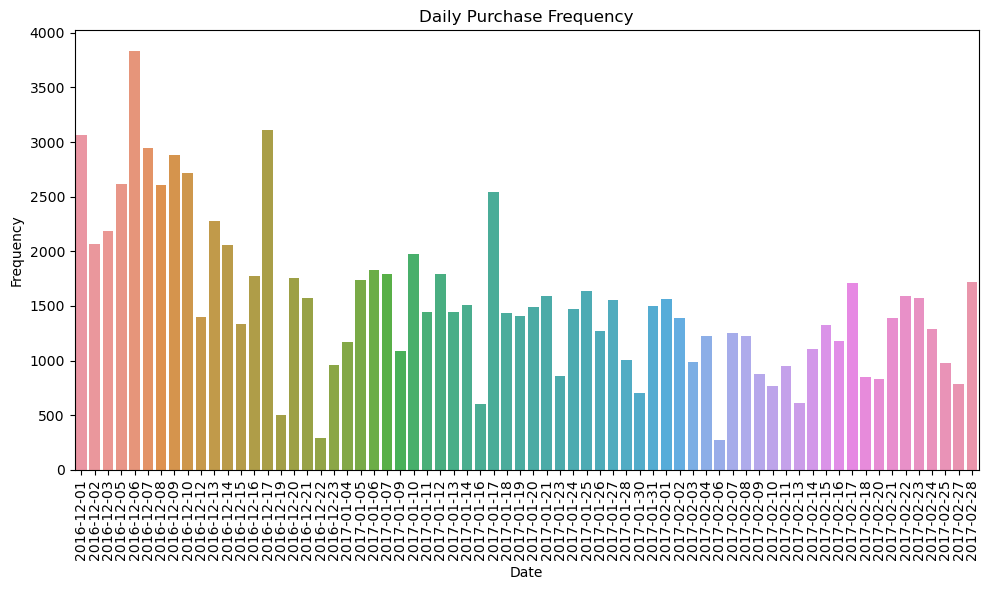

In [145]:
plt.figure(figsize=(10,6))
sns.barplot(data=daily_purchase_freq, x='purchase_day', y='purchase_id')
plt.title('Daily Purchase Frequency')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [146]:
daily_purchase_freq.sort_values(by='purchase_id', ascending=False).head(3)

,purchase_day,purchase_id
4,2016-12-06,3830
14,2016-12-17,3112
0,2016-12-01,3063


terdapat 3 tanggal yang memiliki frekuensi pembelian per hari lebih dari 3000 ialah 
- 6 Desember 2016 = 3830 
- 17 Desember 2016 = 3112 
- 1 Desember 2016 = 2063

In [147]:
#tugas 2 : rata-rata frekuensi pembelian per hari
daily_purchase_freq['purchase_id'].mean()

1533.8529411764705

berdasarkan pengolahan diketahui dalam 1 hari terdapat 1533 kali aktivitas pembelian 

In [148]:
#tugas 1 : bulan
monthly_purchase_freq = df_retail.groupby('purchase_month')['purchase_id'].count().reset_index()

monthly_purchase_freq.head()

,purchase_month,purchase_id
0,1,34895
1,2,27452
2,12,41955


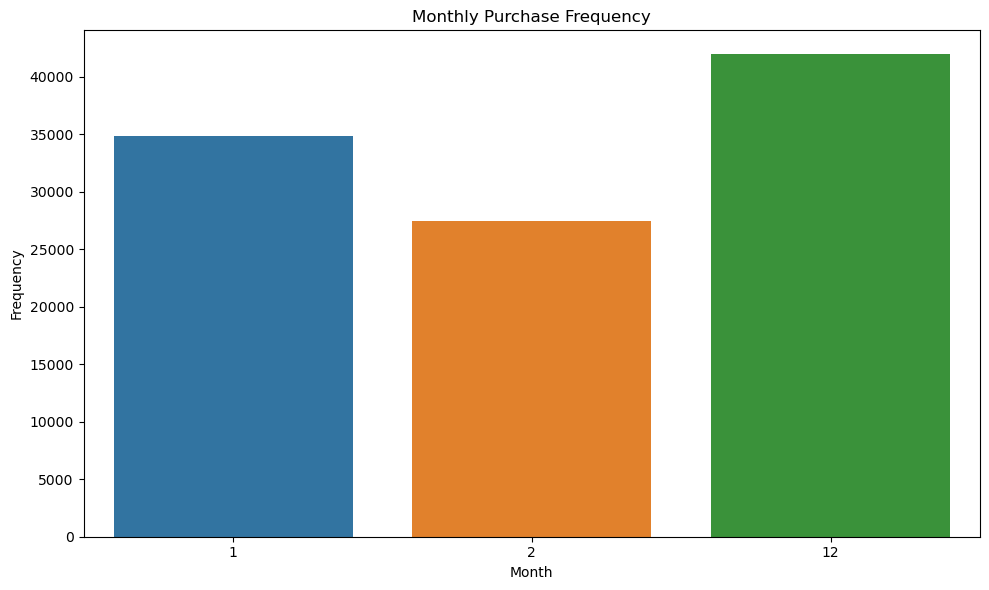

In [149]:
monthly_purchase_order = monthly_purchase_freq.sort_values(by='purchase_id', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_purchase_order, x='purchase_month', y='purchase_id')
plt.title('Monthly Purchase Frequency')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

bulan desember 2016 merupakan bulan dengan pencapaian tertinggi sepanjang dataset dimana terdapat 41955 kali aktivtas pembelian yang terekam

In [150]:
#tugas 1 : tahun
annual_purchase_freq = df_retail.groupby('purchase_year')['purchase_id'].count().reset_index()

annual_purchase_freq.head()

,purchase_year,purchase_id
0,2016,41955
1,2017,62347


berdasarkan tabel diektahui bahwa pada tahun 2016 tercatat 41955 kali aktivitas pembelian dan pada tahun 2017 mencapai 62347 kali

In [151]:
#tugas 3: quntity count per hari 
daily_quantity_count = df_retail.groupby('purchase_day')['quantity'].sum().reset_index()
daily_quantity_count.head()

,purchase_day,quantity
0,2016-12-01,23649
1,2016-12-02,18890
2,2016-12-03,12597
3,2016-12-05,13567
4,2016-12-06,17413


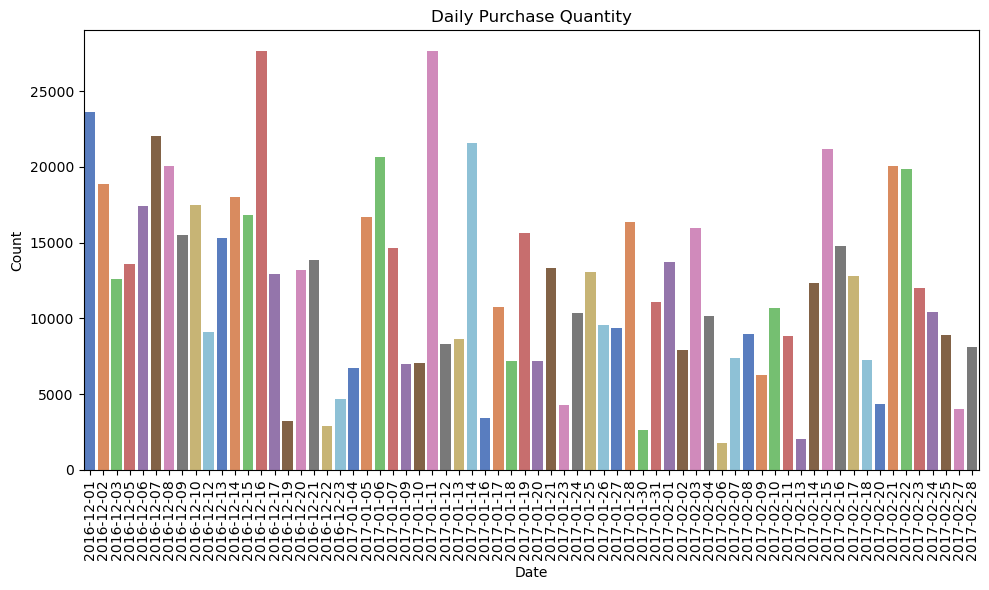

In [152]:
plt.figure(figsize=(10,6))
sns.barplot(data=daily_quantity_count, x='purchase_day', y='quantity', palette='muted')
plt.title('Daily Purchase Quantity')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [153]:
daily_quantity_count.sort_values(by='quantity', ascending=False).head(3)

,purchase_day,quantity
13,2016-12-16,27635
26,2017-01-11,27634
0,2016-12-01,23649


In [154]:
#tugas 4 
daily_quantity_count['quantity'].mean()

12091.367647058823

diketahui 
- 16 desember 2016 merupakan tanggal yang memiliki jumlah pembelian tertinggi yaitu 27635 unit 
- 11 januari 2017 memiliki jumlah pembelian sebanyak 27634 unit 
- 6 februari 2017 merupakan jumalah pembelian terendah
- rata rata jumlah pembelian harian bisnis adalah 12091 unit

In [155]:
#tugas 3: quntity count per bulan 
monthly_quantity_count = df_retail.groupby('purchase_month')['quantity'].sum().reset_index()
monthly_quantity_count.head()

,purchase_month,quantity
0,1,273381
1,2,249943
2,12,298889


berdasarkan tabel diatas dapat dilihat adalah jumlah unit yang dibeli untuk ketiga bulan tidak terlalu berbeda dimana ketiganya lebih dari 200000. walaupun demikian, bulan desember merupakan bulan dengan jumlah volume pembelian terbesar yaitu 29889

In [156]:
#tugas 3: quntity count per tahun 
annual_quantity_count = df_retail.groupby('purchase_year')['quantity'].sum().reset_index()
annual_quantity_count.head()

,purchase_year,quantity
0,2016,298889
1,2017,523324


berdasarkan jumlah bulan yang tercatat untuk masing masing tahun, dapat dipastikan bahwa jumlah total unit pada tahun 2017 akan lebih banyak 
dibandingkan dengan tahun 2016

In [157]:
#tugas 5 : user unik per hari
daily_user_unique = df_retail.groupby('purchase_day')['customer_id'].nunique().reset_index()
daily_user_unique.head()

,purchase_day,customer_id
0,2016-12-01,98
1,2016-12-02,117
2,2016-12-03,56
3,2016-12-05,76
4,2016-12-06,90


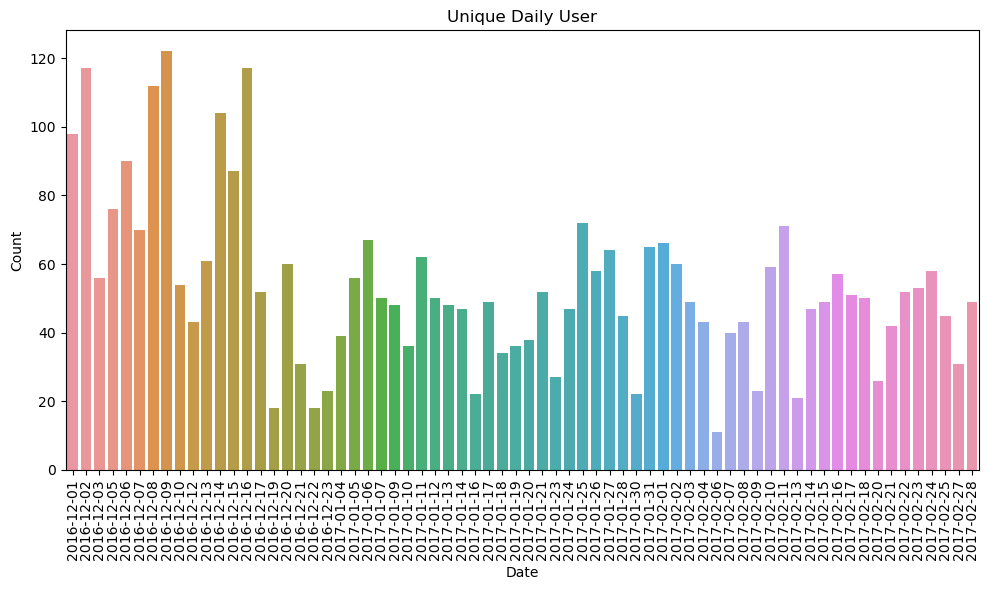

In [158]:
plt.figure(figsize=(10,6))
sns.barplot(data=daily_user_unique, x='purchase_day', y='customer_id')
plt.title('Unique Daily User')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [159]:
daily_user_unique.sort_values(by='customer_id', ascending=False).head(3)

,purchase_day,customer_id
7,2016-12-09,122
1,2016-12-02,117
13,2016-12-16,117


In [160]:
daily_user_unique.sort_values(by='customer_id', ascending=False).tail(3)

,purchase_day,customer_id
18,2016-12-22,18
15,2016-12-19,18
48,2017-02-06,11


In [161]:
#tugas 6
daily_user_unique['customer_id'].mean()

53.51470588235294

diketahui 
- 9 Desember 2016 : tanggal dengan user unik tertinggi = 122 id 
- 6 Februari 2017 : tanggal dengan user unik terendah = 11 id
- rata-rata dalam 1 hari terdapat 53 user unik

In [162]:
#tugas 5 : user unik per bulan
month_user_unique = df_retail.groupby('purchase_month')['customer_id'].nunique().reset_index()
month_user_unique.head()

,purchase_month,customer_id
0,1,783
1,2,798
2,12,948


diketahui jumlah user unik antara bulan januari dan februari tidak terlalu berbeda, hanya selisih 15 user. sedangkan pada bulan desember jumlah user unik mencapai 948 id

In [163]:
annual_user_unique = df_retail.groupby('purchase_year')['customer_id'].nunique().reset_index()
annual_user_unique.head()

,purchase_year,customer_id
0,2016,948
1,2017,1282


data tahun 2017 terdiri dari 2 bulan sedangkan pada tahun 2016 hanya 1 bulan yang terlibat, secara umum dapat diasumsikan bahwa jumlah user unik pada tahun 2017 kebih banyaj dibandingkan pada tahun 2016. Hal ini telah dibuktikan dengan data diatas

# Data Analisa : Revenue

1. revenue harian 
2. revenue bulan 
3. revenue tahun 

In [164]:
df_retail.sample()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_day,purchase_month,purchase_year
84625,536520,84985A,0,2016-12-01 12:43:00,20408,0,Shop 0,2016-12-01,12,2016


In [165]:
df_product.sample()

,product_id,price_per_one
390,21175,1.85


In [166]:
#cek kolom apakah product_id = item_id 
is_in_product = df_retail['item_id'].isin(df_product['product_id'])
is_in_product.value_counts()

item_id
True    104302
Name: count, dtype: int64

dikarenakan product_id sama dengan item_id maka kita bisa gabungkan 2 tabel tersebut berdasarkan item id 

In [167]:
df_merge = pd.merge(df_retail, df_product, left_on='item_id', right_on='product_id', how='left')
df_merge.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_day,purchase_month,purchase_year,product_id,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,12,2016,21873,0.42
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,2016-12-14,12,2016,22195,1.65
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,2016-12-14,12,2016,21239,0.72
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2017-02-09,2,2017,22271,2.55
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,2017-02-13,2,2017,79321,0.00


In [168]:
#menghapus kolom product_id karena sudah diwakilkan oleh kolom item_id 
df_merge = df_merge.drop('product_id',axis=1)

In [169]:
df_merge.columns

Index(['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id',
       'loyalty_program', 'shop_id', 'purchase_day', 'purchase_month',
       'purchase_year', 'price_per_one'],
      dtype='object')

In [170]:
df_merge['total_revenue'] = df_merge['quantity'] * df_merge['price_per_one']
df_merge.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_day,purchase_month,purchase_year,price_per_one,total_revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,12,2016,0.42,4.62
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,2016-12-14,12,2016,1.65,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,2016-12-14,12,2016,0.72,5.04
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2017-02-09,2,2017,2.55,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,2017-02-13,2,2017,0.00,0.00


In [171]:
df_revenue = df_merge
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104302 entries, 0 to 104301
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      104302 non-null  int32         
 5   loyalty_program  104302 non-null  int64         
 6   shop_id          104302 non-null  object        
 7   purchase_day     104302 non-null  object        
 8   purchase_month   104302 non-null  int32         
 9   purchase_year    104302 non-null  int32         
 10  price_per_one    104302 non-null  float64       
 11  total_revenue    104302 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(4)
memory usage: 8.4+ MB


In [172]:
#total revenue sehari 
daily_revenue = df_revenue.groupby('purchase_day')['total_revenue'].sum().reset_index()
daily_revenue.head()

,purchase_day,total_revenue
0,2016-12-01,26913.22
1,2016-12-02,26914.11
2,2016-12-03,14341.68
3,2016-12-05,14747.20
4,2016-12-06,20183.17


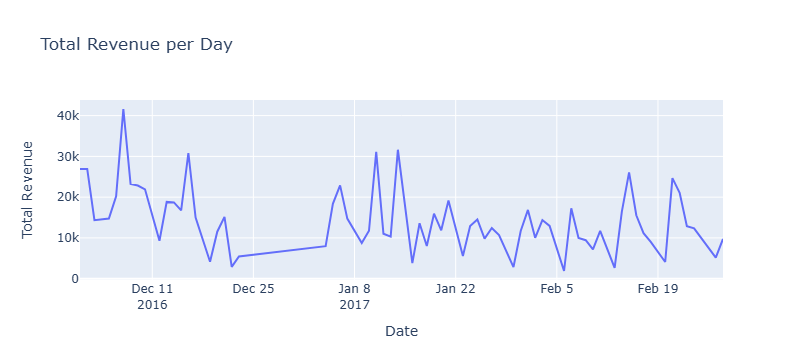

<Figure size 1000x600 with 0 Axes>

In [173]:
#plot
plt.figure(figsize=(10,6))
fig = px.line(daily_revenue, x='purchase_day', y='total_revenue', title='Total Revenue per Day')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Total Revenue')
fig.show()

- berdasarkan grafik grais yang ditampilkan dapat dilihat bahwa bisnis memperoleh pendapatan yang fluktuatif dengan tren menurun
- pendapatan awal bisnis pada tanggal 1 Desember 2016 adalah 26.91322 dolar
- pendapatan akhir bisnis pada tanggal 28 Februari 2017 adalah 9.743,36 dolar 
- pendapatan tertinggi bisnis pada tanggal 7 Desember 2016 adalah 41.62043 dolar
- pendapatan terendah bisnis pada tanggal 6 Februari 2017 adalah 1.888,13 dolar

In [174]:
daily_revenue['total_revenue'].mean()

14344.795

rata-rata pendapatan harian yang diperoleh oleh bisnis retail bangunan adalah 14.344,795 dolar

<Figure size 1000x600 with 0 Axes>

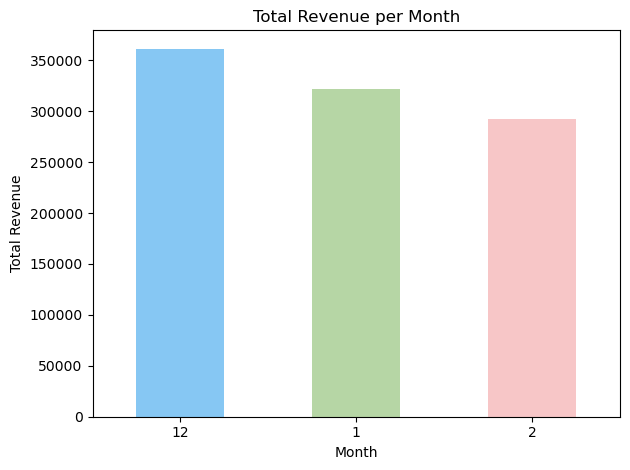

In [175]:
#total revenue bulan 
monthly_revenue = df_revenue.groupby('purchase_month')['total_revenue'].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values(by='total_revenue', ascending=False)

colors = ['#86c7f3', '#b6d6a5', '#f7c6c7']

# Plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(x='purchase_month', y='total_revenue', kind='bar', color=colors, legend=False)
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- berdasarkan grafik diatas dapat dilihat bahwa total pendapatan bisnis mengalami penurunan dari bulan ke bulan 

In [176]:
annual_revenue = df_revenue.groupby('purchase_year')['total_revenue'].sum().reset_index()
annual_revenue

,purchase_year,total_revenue
0,2016,361327.71
1,2017,614118.35


- pendapatan total bisnis pada tahun 2016 ialah 361.327,71 dolar 
- pendapatan total bisnis pada tahun 2017 ialah 641.118,35 dolar

# Data Analisa : Loyalty Program

1. cek customer id unik member dan non 
2. pendapatan bisnis dari member dan non hari bulan tahun
3. distribusi frekuensi member dan non member  
4. distribusi volume member dan non member  

In [177]:
#cek jumlah id yang berstatus member dan non
customer_program = df_revenue.groupby('loyalty_program')['customer_id'].nunique().reset_index()
customer_program

,loyalty_program,customer_id
0,0,1162
1,1,587


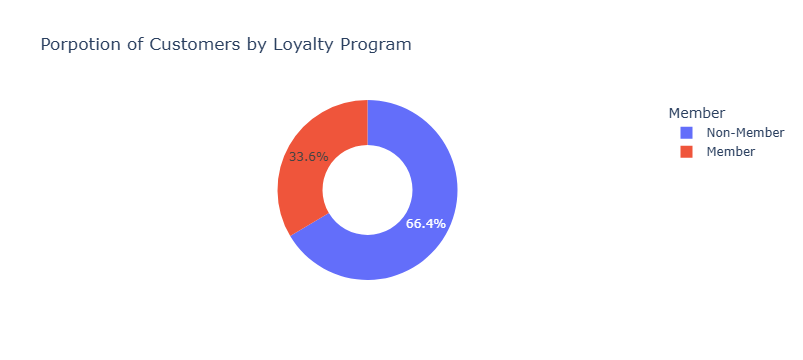

In [178]:
#plot pie chart 
labels = ['Non-Member','Member']
values = customer_program['customer_id']

pie = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])

#layout 
pie.update_layout(title='Porpotion of Customers by Loyalty Program', legend=dict(title='Member'))

pie.show()

dikethaui 
- jumlah customer id yang merupakan member bisnis sebanyak 587 user unik 
- jumlah customer id yang tidak member bisnis sebanyak1162 user unik

In [179]:
member = df_revenue.query('loyalty_program==1')
member.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_day,purchase_month,purchase_year,price_per_one,total_revenue
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,2016-12-14,12,2016,1.65,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,2016-12-14,12,2016,0.72,5.04
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2017-02-09,2,2017,2.55,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,2017-02-13,2,2017,0.00,0.00
5,538379,22965,0,2016-12-12 11:26:00,22805,1,Shop 20,2016-12-12,12,2016,1.85,0.00


In [180]:
member.shape

(23412, 12)

In [181]:
non_member = df_revenue.query('loyalty_program==0')
non_member.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_day,purchase_month,purchase_year,price_per_one,total_revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,12,2016,0.42,4.62
6,540468,22189,0,2017-01-07 13:55:00,18427,0,Shop 0,2017-01-07,1,2017,2.31,0.00
7,541424,79321,1,2017-01-17 17:57:00,18427,0,Shop 0,2017-01-17,1,2017,0.00,0.00
8,538883,22891,0,2016-12-14 15:56:00,18427,0,Shop 0,2016-12-14,12,2016,3.75,0.00
11,541696,22197,4,2017-01-20 18:08:00,18427,0,Shop 0,2017-01-20,1,2017,0.72,2.88


In [182]:
non_member.shape

(80890, 12)

berdasarkan pembagian data berdasarkan loyalty program dapat diketahui bahwa jumlah baris yang non member lebih banyak dibandingkan dengan konsumen yang merupakan member. adapun jumlah baris dari masing masing kategori adalah 
- member = 23412 
- non member = 80890

In [183]:
#cek revenue 
member_revenue = df_revenue.groupby(['purchase_month','loyalty_program'])['total_revenue'].sum().reset_index()
member_revenue

,purchase_month,loyalty_program,total_revenue
0,1,0,259443.16
1,1,1,62110.30
2,2,0,200135.32
3,2,1,92429.57
4,12,0,254341.97
5,12,1,106985.74


In [184]:
non_member_revenue = df_revenue.groupby(['purchase_month','loyalty_program'])['total_revenue'].sum().reset_index()
non_member_revenue

,purchase_month,loyalty_program,total_revenue
0,1,0,259443.16
1,1,1,62110.30
2,2,0,200135.32
3,2,1,92429.57
4,12,0,254341.97
5,12,1,106985.74


In [185]:
#gabungkan data 
cust_program_revenue = pd.concat([member_revenue,non_member_revenue], ignore_index=True)
cust_program_revenue

,purchase_month,loyalty_program,total_revenue
0,1,0,259443.16
1,1,1,62110.30
2,2,0,200135.32
3,2,1,92429.57
4,12,0,254341.97
5,12,1,106985.74
6,1,0,259443.16
7,1,1,62110.30
8,2,0,200135.32
9,2,1,92429.57


In [186]:
cust_program_revenue['loyalty_program']= cust_program_revenue['loyalty_program'].map({1:'Member' , 0:'Non-Member'})

In [187]:
cust_program_revenue

,purchase_month,loyalty_program,total_revenue
0,1,Non-Member,259443.16
1,1,Member,62110.30
2,2,Non-Member,200135.32
3,2,Member,92429.57
4,12,Non-Member,254341.97
5,12,Member,106985.74
6,1,Non-Member,259443.16
7,1,Member,62110.30
8,2,Non-Member,200135.32
9,2,Member,92429.57


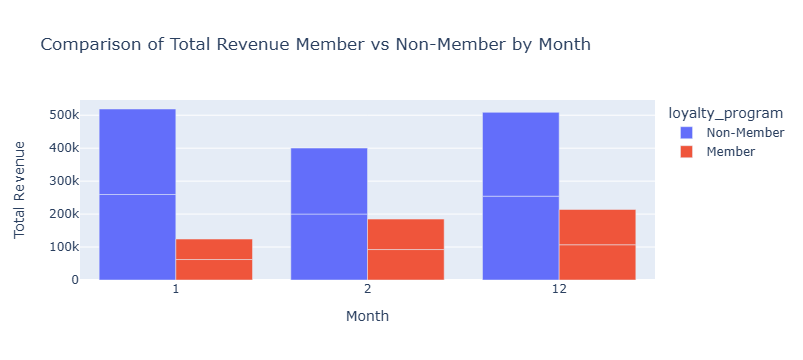

In [188]:
#plot
cust_fig = px.bar(cust_program_revenue, x='purchase_month', y='total_revenue', color='loyalty_program', barmode='group', 
                  labels = {'total_revenue': 'Total Revenue', 'purchase_month':'Month'},
                  title = 'Comparison of Total Revenue Member vs Non-Member by Month')
cust_fig.update_layout(xaxis={'type' : 'category'})

cust_fig.show()

- pendapatan dari konsumen yang bukan member lebih besar dibandingkan dengan pendapatan dari konsumen member 
- pendapatan dari member mempunyai tren segita terbalik dimana pendapatan bulan 12 dan 2 lebih tinggi dibandingkan dengan pendapatan pada bulan 1 
- pendapatan dari non member mempunyai tren menurun dimana pendapatan bulan 12 dan 1 relatif sama tetapi pada bulan ke 2 menurun 100K dolar

In [189]:
#total revenue member non member 
tot_rev_member = member['total_revenue'].sum()
tot_rev_non = non_member['total_revenue'].sum()

'Total pendapatan bisnis dari member dan non member secara berurutan',(tot_rev_member,tot_rev_non)

('Total pendapatan bisnis dari member dan non member secara berurutan',
 (261525.61, 713920.45))

In [190]:
#distribusi frekuensi konsumen member 
freq_member_daily = member.groupby('purchase_day')['purchase_id'].count().reset_index()
freq_member_daily.head()

,purchase_day,purchase_id
0,2016-12-01,697
1,2016-12-02,869
2,2016-12-03,462
3,2016-12-05,756
4,2016-12-06,973


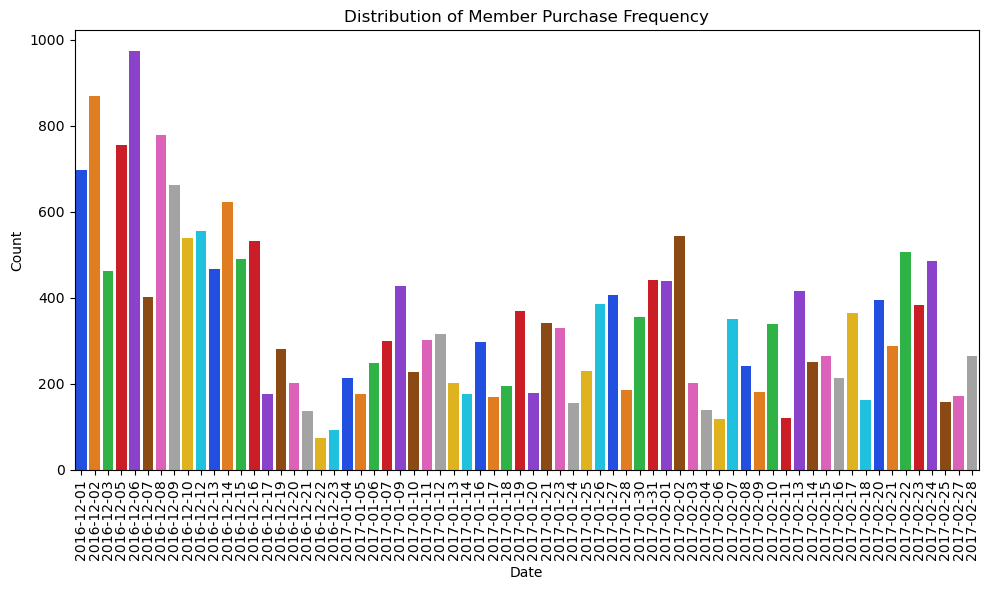

In [191]:
plt.figure(figsize=(10,6))
sns.barplot(data=freq_member_daily, x='purchase_day', y='purchase_id', palette='bright')
plt.title('Distribution of Member Purchase Frequency')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

berdasarkan hasil distribusi grafik khusus untuk member, pola yang dihasilkan serupa dengan distribusi pembelian total dimana tanggal 6 Des 2016 tetap menjadi yang tertinggi

In [192]:
#distribusi frekuensi konsumen member 
freq_non_member_daily = non_member.groupby('purchase_day')['purchase_id'].count().reset_index()
freq_non_member_daily.head()

,purchase_day,purchase_id
0,2016-12-01,2366
1,2016-12-02,1199
2,2016-12-03,1722
3,2016-12-05,1863
4,2016-12-06,2857


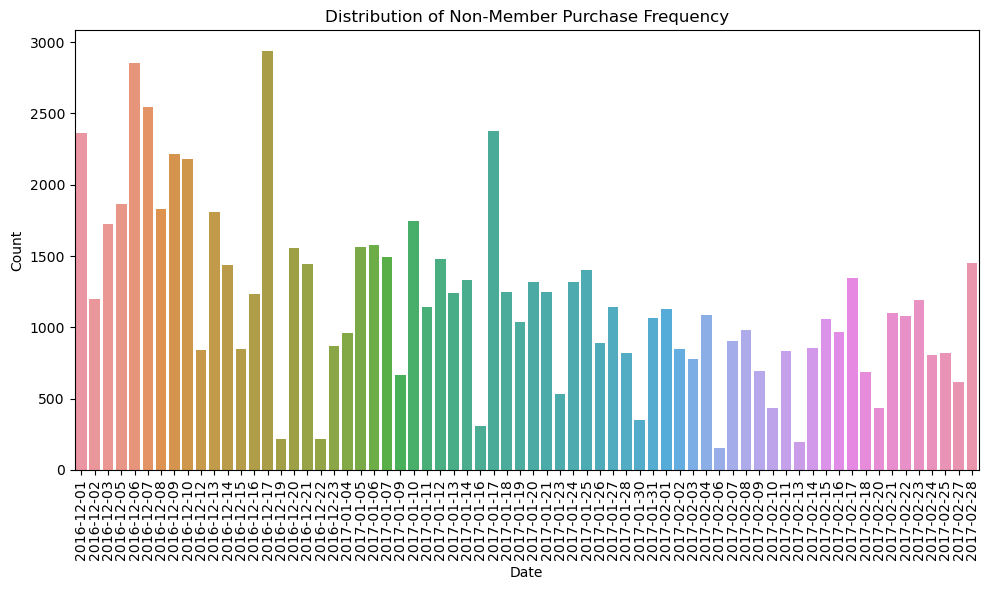

In [193]:
plt.figure(figsize=(10,6))
sns.barplot(data=freq_non_member_daily, x='purchase_day', y='purchase_id')
plt.title('Distribution of Non-Member Purchase Frequency')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

berbeda dengan distribusi frekuensi untuk kategori member, hasil sebaran data untuk kategori non member justru mempunyai peek di tanggal 17 Desember 2016. lebih lanjut, pola sebaran data untuk kategori non member berbeda dengan frekuensi pembelian secara keseluruhan

In [194]:
#distribusi volume member, non member
vol_member = member.groupby('purchase_day')['quantity'].sum().reset_index()
vol_member.head()

,purchase_day,quantity
0,2016-12-01,5022
1,2016-12-02,10066
2,2016-12-03,2319
3,2016-12-05,4819
4,2016-12-06,6263


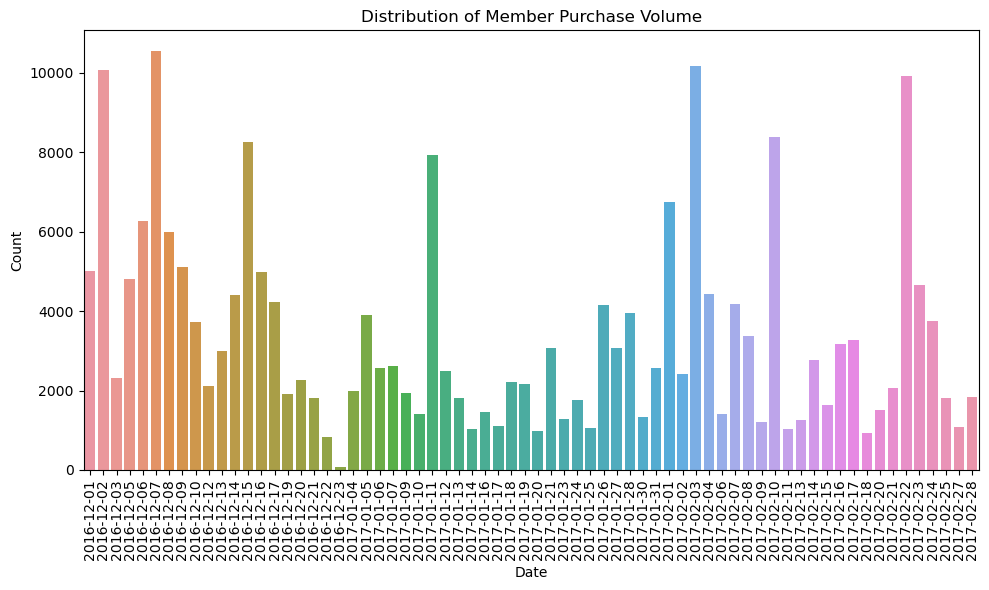

In [195]:
plt.figure(figsize=(10,6))
sns.barplot(data=vol_member, x='purchase_day', y='quantity')
plt.title('Distribution of Member Purchase Volume')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- berdasarkan hasil grafik diketahui pola data volume dari pelanggan member berbeda dengan pola volume total
- terdapat 7 kali dalam 3 bulan tersebut yang konsmen member membeli dengan jumlah yang besar 
- tanggal 15 desember 2016 diketahui waktu dimana jumlah kuantitas barang yang dibeli oleh member tertinggi yaitu lebih dari 10K unit

In [196]:
vol_non_member = non_member.groupby('purchase_day')['quantity'].sum().reset_index()
vol_non_member.head()

,purchase_day,quantity
0,2016-12-01,18627
1,2016-12-02,8824
2,2016-12-03,10278
3,2016-12-05,8748
4,2016-12-06,11150


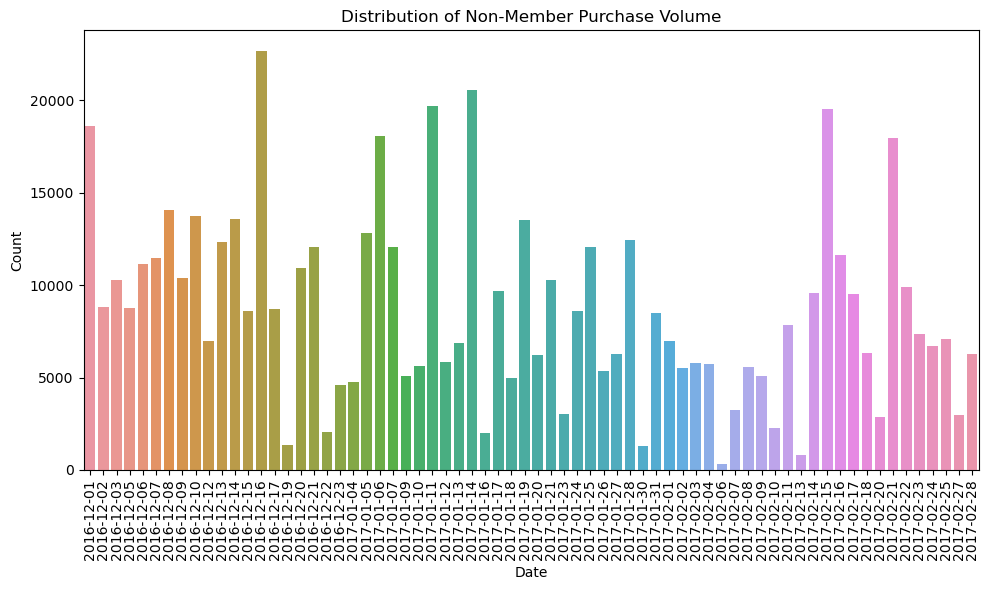

In [197]:
plt.figure(figsize=(10,6))
sns.barplot(data=vol_non_member, x='purchase_day', y='quantity')
plt.title('Distribution of Non-Member Purchase Volume')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- pola yang dihasilkan dari sebaran data volume pemeblian oleh konsumen non member berbeda dengan pola volume total 
- terdapat 7 tanggal yang memiliki penjualan volume signifikan dibandingkan dengan yang lainnya
- 16 desember 2016 merupakan waktu dimana volume penjualan bisnis mencapai lebih dari 20K unit

# Data Analisa : Shop

1. perbandingan total pendapatan antar toko
2. rata rata pendapatan per transaksi
3. perbandingan frekuensi aktivitas membeli antar toko
4. analisa efektivitas program loyalitas mempertahankan konsumen
5. rata rata jumlah pembelian per transaksi 

In [198]:
df_revenue['shop_id'].value_counts()

shop_id
Shop 0     38303
Shop 1      2689
Shop 15     2679
Shop 24     2624
Shop 22     2538
Shop 5      2469
Shop 9      2447
Shop 13     2411
Shop 20     2402
Shop 14     2366
Shop 30     2359
Shop 7      2311
Shop 28     2306
Shop 26     2299
Shop 27     2296
Shop 11     2274
Shop 2      2224
Shop 19     2209
Shop 29     2181
Shop 10     2181
Shop 17     2164
Shop 23     2041
Shop 18     1995
Shop 4      1964
Shop 8      1963
Shop 16     1920
Shop 25     1902
Shop 12     1758
Shop 3      1703
Shop 6      1673
Shop 21     1651
Name: count, dtype: int64

In [199]:
# total pendapatan antar toko
total_revenue_per_shop = df_revenue.groupby('shop_id')['total_revenue'].sum().reset_index()
total_revenue_per_shop = total_revenue_per_shop.sort_values(by='total_revenue', ascending=False)
total_revenue_per_shop.head()

,shop_id,total_revenue
7,Shop 15,111537.83
0,Shop 0,105171.58
26,Shop 5,63046.14
25,Shop 4,39778.52
13,Shop 20,39468.26


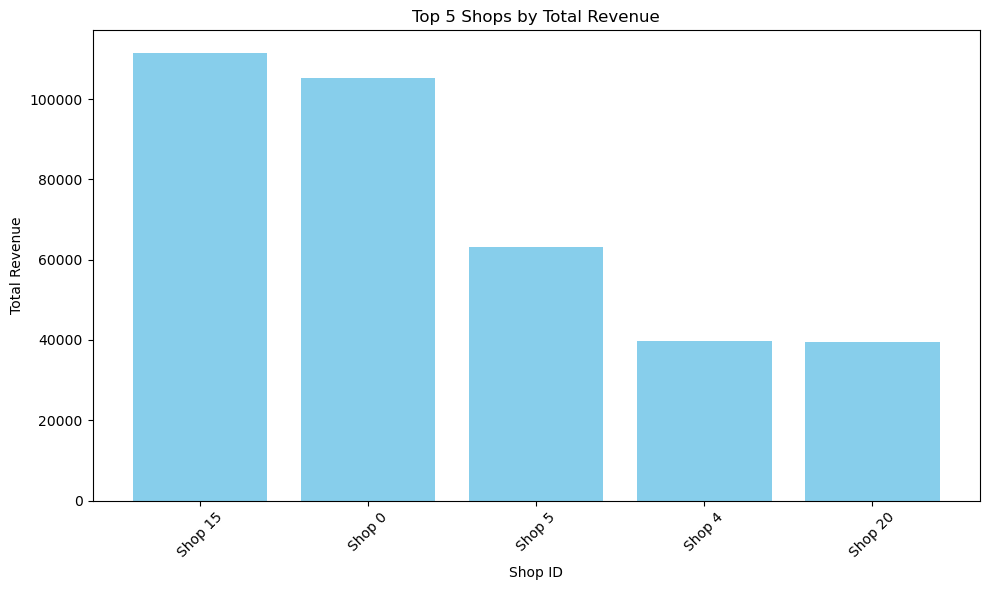

In [200]:
# plot top 5 toko 
plt.figure(figsize=(10, 6))
plt.bar(total_revenue_per_shop['shop_id'][:5], total_revenue_per_shop['total_revenue'][:5], color='skyblue')
plt.xlabel('Shop ID')
plt.ylabel('Total Revenue')
plt.title('Top 5 Shops by Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 5 toko dengan pendapatan tertinggi ialah 
    - high revenue : pendapatan > 100K : shop 15 dan shop 0 
    - mid revenue : pendapatan 40K - 99K : shop 5 
    - low revenue : pendapatan <40K : shop 4 dan shop 20 

In [201]:
# total pendapatan per transaksi per toko
avg_revenue_per_transaction = df_revenue.groupby('shop_id')['total_revenue'].mean().reset_index()
avg_revenue_per_transaction = avg_revenue_per_transaction.sort_values(by='total_revenue', ascending=False)
avg_revenue_per_transaction.head()

,shop_id,total_revenue
7,Shop 15,41.634128
26,Shop 5,25.535091
25,Shop 4,20.253829
18,Shop 25,18.137182
23,Shop 3,16.618696


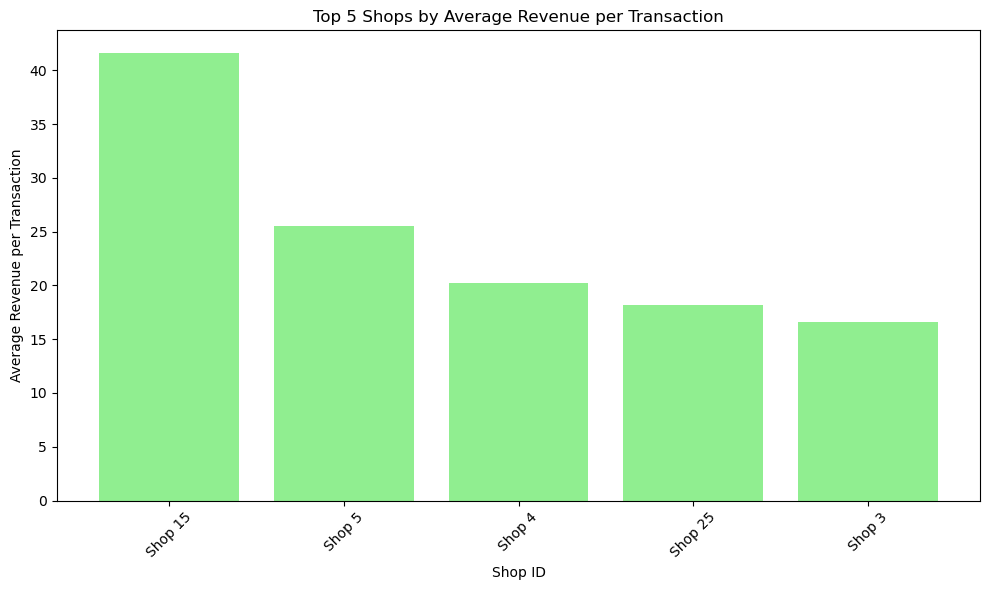

In [202]:
# plot top 5 toko
plt.figure(figsize=(10, 6))
plt.bar(avg_revenue_per_transaction['shop_id'][:5], avg_revenue_per_transaction['total_revenue'][:5], color='lightgreen')
plt.xlabel('Shop ID')
plt.ylabel('Average Revenue per Transaction')
plt.title('Top 5 Shops by Average Revenue per Transaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- tidak hanya dalam total revenue, ternyata jumlah pendapatan per transaksi, shop 15 masih menjadi peringkat pertama dengan rata rata 40 dolar per transaksi
- shop 5 dan shop 4 memiliki total revenue dibawah dari 40K dolar, walaupun demikian kedua shop ini menempati posisi ke 2 dan 3 untuk besar pendapatann yang diperoleh per transaksi yakni rata rata 25 & 20 dolar
- shop 0 dan shop 20 ternyata tidak memiliki rata rata pendapatan per transaksi yang tinggi, melainkan shop 25 dan shop 3 dengan rata rata pendapatan dibawah 20 dolar

In [203]:
# volume penjualan per toko
sales_volume_per_shop = df_revenue.groupby('shop_id')['purchase_id'].count().reset_index()
sales_volume_per_shop = sales_volume_per_shop.sort_values(by='purchase_id', ascending=False)
sales_volume_per_shop.head()

,shop_id,purchase_id
0,Shop 0,38303
1,Shop 1,2689
7,Shop 15,2679
17,Shop 24,2624
15,Shop 22,2538


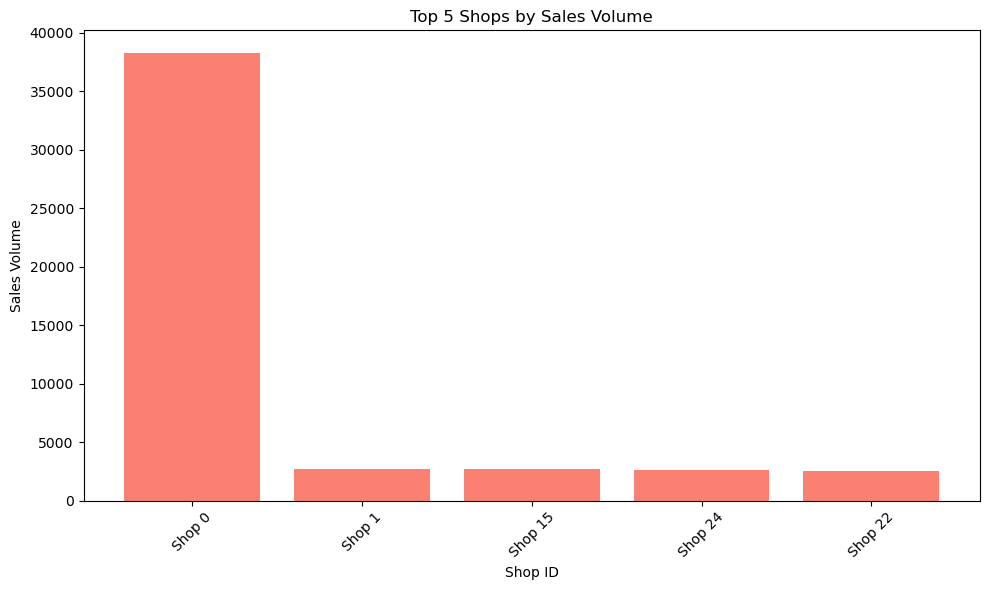

In [204]:
# plot
plt.figure(figsize=(10, 6))
plt.bar(sales_volume_per_shop['shop_id'][:5], sales_volume_per_shop['purchase_id'][:5], color='salmon')
plt.xlabel('Shop ID')
plt.ylabel('Sales Volume')
plt.title('Top 5 Shops by Sales Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- hanya shop 0 yang mampu menjual dengan total volume lebih dari 37000 unit 

In [205]:
# mencari jumlah pelanggan yang masih lanjut menjadi member 
customer_retention_rate = df_revenue.groupby('shop_id')['customer_id'].nunique() / df_revenue.groupby('shop_id')['customer_id'].nunique().sum() * 100
customer_retention_rate = customer_retention_rate.reset_index().rename(columns={'customer_id': 'retention_rate'})
customer_retention_rate = customer_retention_rate.sort_values(by='retention_rate', ascending=False)
customer_retention_rate.head()

,shop_id,retention_rate
28,Shop 7,3.601969
26,Shop 5,3.576056
11,Shop 19,3.576056
0,Shop 0,3.550143
19,Shop 26,3.498316


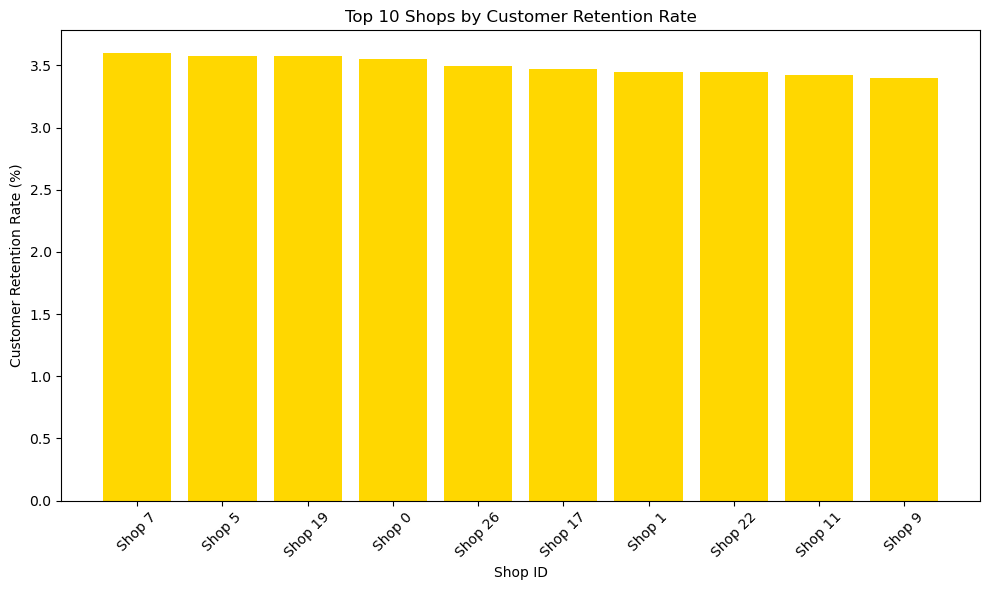

In [206]:
plt.figure(figsize=(10, 6))
plt.bar(customer_retention_rate['shop_id'][:10], customer_retention_rate['retention_rate'][:10], color='gold')
plt.xlabel('Shop ID')
plt.ylabel('Customer Retention Rate (%)')
plt.title('Top 10 Shops by Customer Retention Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- berdasarkan gambar diatas dapat dilihat bahwa lebih dari 3% dari member tetap melanjtukan menjadi member dari bisis

In [207]:
# rata rata jumlah item yang dibeli per transaksi
avg_item_count = df_revenue.groupby('shop_id')['quantity'].mean().reset_index()
avg_item_count = avg_item_count.sort_values(by='quantity', ascending=False)
avg_item_count.head()

,shop_id,quantity
7,Shop 15,40.283315
25,Shop 4,17.630855
23,Shop 3,17.075749
26,Shop 5,16.554070
18,Shop 25,15.330179


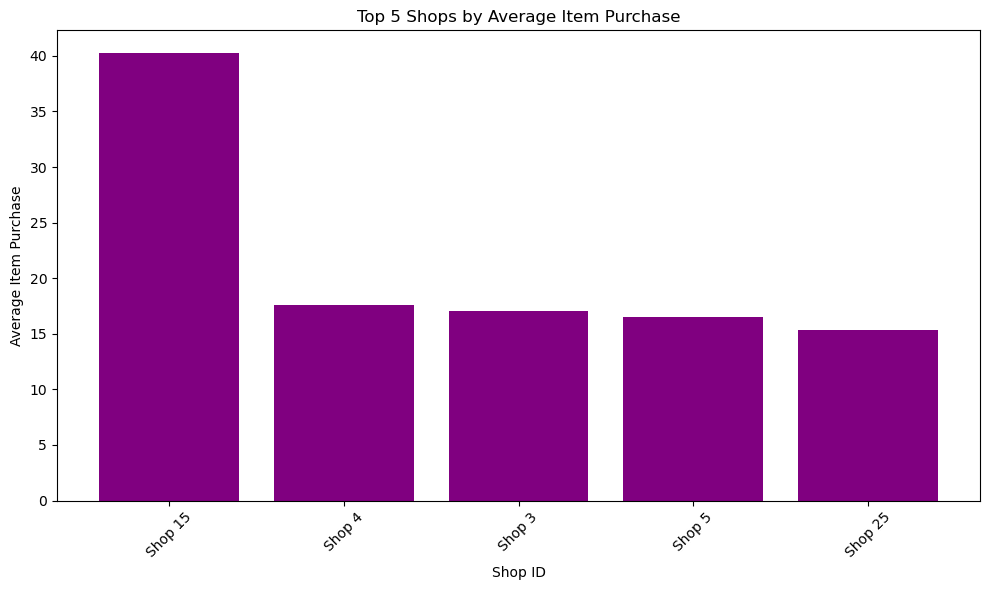

In [208]:
plt.figure(figsize=(10, 6))
plt.bar(avg_item_count['shop_id'][:5], avg_item_count['quantity'][:5], color='purple')
plt.xlabel('Shop ID')
plt.ylabel('Average Item Purchase')
plt.title('Top 5 Shops by Average Item Purchase')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- hanya shop 15 yang dimana rata-rata jumlah item yang dibeli konsumen mencapai 40 item 
- shop lainnya memiliki rata ratat jumlah item yang dibeli dibawah 20 item

# Data Analisa : Item

1. Rata rata jumlah item yang dibeli berdasarkan loyalty program
2. Item yang paling banyak terjual
3. Rata-rata harga per item untuk setiap toko

In [209]:
#jumlah item per program 
avg_quantity_by_program = df_revenue.groupby('loyalty_program')['quantity'].mean()
avg_quantity_by_program

loyalty_program
0    7.337372
1    9.768196
Name: quantity, dtype: float64

berdasarkan pengolahan data diatas dapat dilihat bahwa rata-rata jumlah item yang dibeli oleh konsumen member lebih banyak dibandingkan dengan non member. Besar item yang dibeli adalah 7 item untuk non member dan 10 untuk member

In [210]:
#produk yang paling populer 
top_items = df_revenue.groupby('item_id')['quantity'].sum().sort_values(ascending=False).head(5)
top_items.reset_index()

,item_id,quantity
0,84077,10126
1,85123A,10051
2,21212,9291
3,85099B,7471
4,22197,6918


berdasarkan tabel diatas dapat diketahui produk dengan item id 84077 dan 85123A merupakan 2 item yang paling populer dalam 3 bulan rekapan data yang dimiliki. Jumlah produk yang terjual mencapai lebih dari 10K unit

In [211]:
#rata rata harga item di berbagai toko
avg_price_shop = df_revenue.groupby('shop_id')['price_per_one'].mean().reset_index().sort_values(by='price_per_one', ascending=False)
avg_price_shop.head()

,shop_id,price_per_one
2,Shop 10,2.390128
14,Shop 21,2.340406
5,Shop 13,2.330693
22,Shop 29,2.320752
6,Shop 14,2.316238


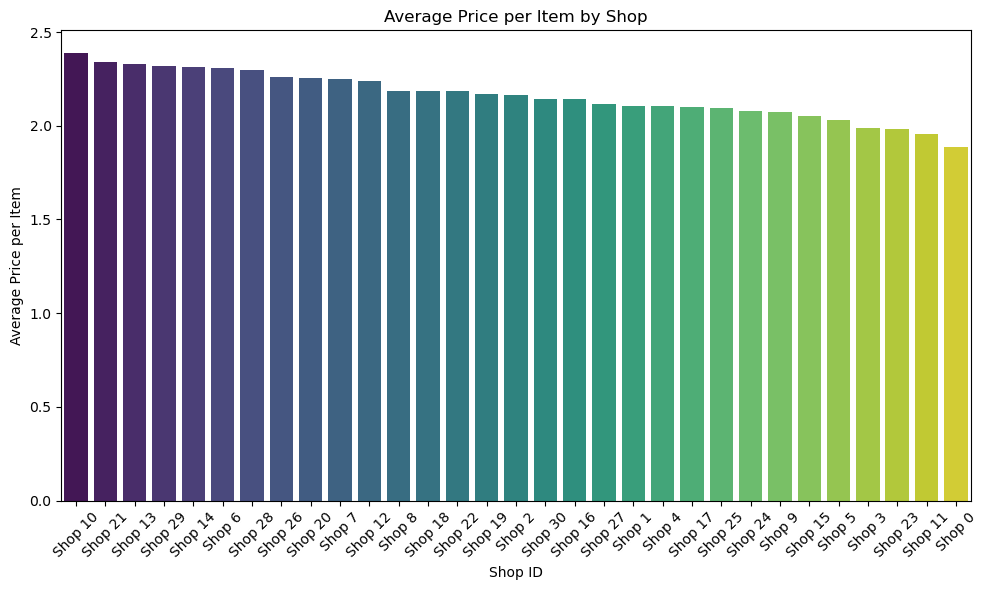

In [212]:
plt.figure(figsize=(10, 6))
sns.barplot(x='shop_id', y='price_per_one', data=avg_price_shop, palette='viridis')
plt.title('Average Price per Item by Shop')
plt.xlabel('Shop ID')
plt.ylabel('Average Price per Item')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- berdasarkan bar chart yang ditampilkan dapat diketahui bahwa secara keseluruhan toko menjual produknya dengan nilai diatas 2 dolar.
- shop 10 merupakan toko dengan harga rata rata per unit yang paling tinggi yakni 2.39 dolar 
- shop 0 merupakan toko dengan harga rata rata per unit yang paling rendah yakni 2 dolar

# Korelasi

In [213]:
#cek korelasi antar kolom df_revenue
numeric_columns = ['quantity', 'customer_id', 'loyalty_program', 'purchase_date', 'price_per_one', 'total_revenue']
corr_matrix = df_revenue[numeric_columns].corr()
corr_matrix

,quantity,customer_id,loyalty_program,purchase_date,price_per_one,total_revenue
quantity,1.000000,0.006209,0.003077,0.002178,-0.005644,0.986725
customer_id,0.006209,1.000000,0.837002,0.010261,0.026754,0.007178
loyalty_program,0.003077,0.837002,1.000000,0.007724,0.010934,0.002860
purchase_date,0.002178,0.010261,0.007724,1.000000,0.007329,0.001815
price_per_one,-0.005644,0.026754,0.010934,0.007329,1.000000,0.007378
total_revenue,0.986725,0.007178,0.002860,0.001815,0.007378,1.000000


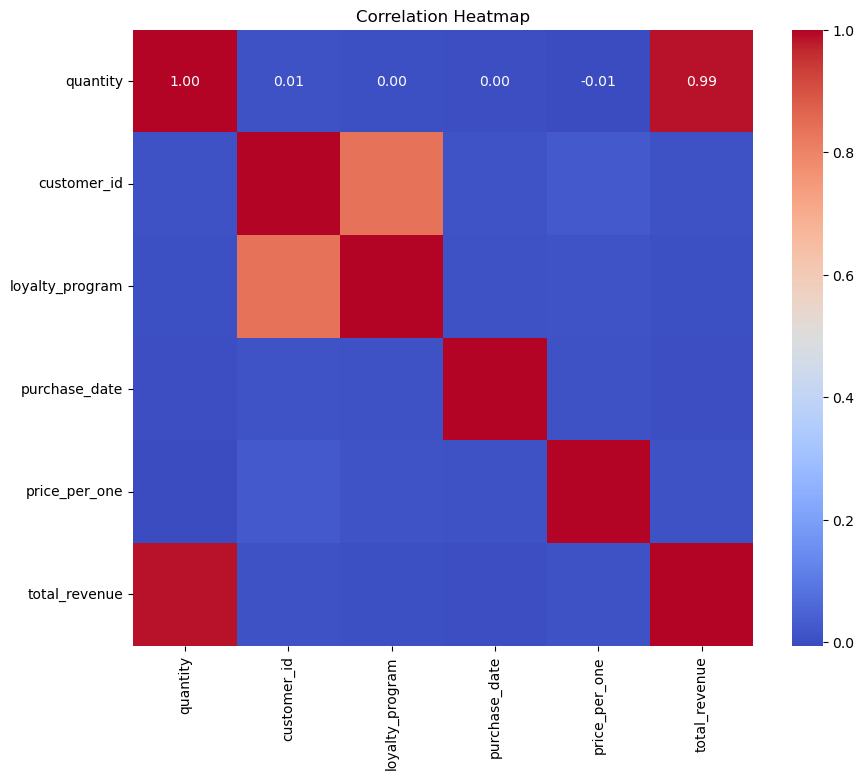

In [214]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Heatmap')
plt.show()

berdasarkan hasil heatmap dapat diketahui terdapat 2 pasang kolom yang memiliki ikatan positif yang kuat yaitu 
- quantity dengan revenue dengan korelasi 0.99
- cusotmer id dengan loyalty program dengan korelasi 0.84

# Hypothesis Testing

hypothesis testing 1 : loyalty program dengan shop id 
- H0 = Tidak terdapat hubungan antar program loyalty dengan loksi gerai
- H1 = Terdapat hubungan antar program loyalty dengan lokasi gerai 
- alpha = 0.05

In [215]:
observe = pd.crosstab(df_revenue['loyalty_program'],df_revenue['shop_id'])

chi2, p, dof, expected = chi2_contingency(observe)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 15043.79479687821
P-value: 0.0


berdasarkan hasil pengolahan data dapat dilihat bahwa hasil chi square sangat besar serta p-value yang kecil dari 0.05. Hal ini berarti kita memilih untuk MENOLAK H0, dimana lokasi gerai menentukan jumlah konsumen yang akan menjadi konsumen tetap bisnis

hipotesis testing 2: loyalty program dengan total revenue
- H0 = Tidak ada perbedaan yang signifikan dalam rata-rata pendapatan total antara pelanggan yang terdaftar dalam program loyalitas dan yang tidak.
- H1 =  Terdapat perbedaan yang signifikan dalam rata-rata pendapatan total antara pelanggan yang terdaftar dalam program loyalitas dan yang tidak.
- alpha : 0.05

In [216]:
loyalty_revenue = df_revenue[df_revenue['loyalty_program'] == 1]['total_revenue']
non_loyalty_revenue = df_revenue[df_revenue['loyalty_program'] == 0]['total_revenue']

t_statistic, p_value = ttest_ind(loyalty_revenue, non_loyalty_revenue, equal_var=False)

print(f"T-test statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in mean total revenue between loyalty program and non-loyalty program customers.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in mean total revenue between loyalty program and non-loyalty program customers.")

T-test statistic: 1.631148455028112
P-value: 0.10286226001572672
Fail to reject null hypothesis: There is no significant difference in mean total revenue between loyalty program and non-loyalty program customers.


berdasarkan hasil perhitungan diatas dapat diketahui bahwa 
- dikarenakan nilai p-value yang lebih besar dibandingkan alpha maka, kita TERIMA H0. artinya tidak cukup bukti untuk menyatakan bahwa terdapat perbedaan yang signifikan antar kelompok
- ada maupun tidak ada program loyal tidak mempengaruhi besar pendapatan bisnis yang akan diperoleh

# Kesimpulan

TAHAP : DATA EKSPLOR
- proyek terdiri ari 2 dataset yaitu df_retail dan df_product 
- df_retail :
	- data terdiri dari 105335 baris dengan 7 kolom 
	- penulisan nama kolom tidak sesuai 
	- tipe kolom yang memuat tanggal tidak sesuai 
	- terdapat missing value pada kolom customer id 
	- terdapat 1033 baris duplikasi 
- df_product :
	- data terdiri dari 3159 baris dengan 2 kolom 
	- data tidak memiliki duplikasi 
	- data tidak memiliki missing value 
	- penulisan nama kolom perlu diperbaiki 
	- tipe data sudah sesuai

TAHAP : DATA ANALISIS
- purchase 
	- data rekapan dimulai dari 1 Desember 2016 dan diakhiri pada tanggal 28 Februari 2017
	- frekuensi pembelian tertinggi harian tercatat pada tanggal 6 Desember 2016 dengan 3830 kali aktivitas pembelian 
	- rata-rata dalam 1 hari terdapat 1533 aktivtas pembelian 
	- bulan desember tercatat sebagai bulan yang memiliki rekuensi aktivitas pembelian tertinggi yakni mencapai 41955 kali 
	- berdasarkan tahun, diketahui aktivitas pembelian pada tahun 2017 lebih tinggi dibandingkan dengan tahun 2016 (62347 > 41955)
	- volume pembelian tertinggi jatuh pada tanggal 16 Desember 2016 dengan menjual 27635 unit 
	- rata-rata retial bahan bangunan mampu menjual sebanyak 12091 unit per hari
	- total volume penjualan bisnis dalam 3 bulan tersebut tidak terlalu jauh dimana tiap bulannya bisnis mampu menjual lebih dari 200ribu unit
	- total volume penjualan pada tahun 2016 mencapai 298889 sedangkan pada tahun 2017 mencapai 523324
	- jumlah user unik tertinggi dalam sehari mencapai 122 id 
	- rata-rata dalam 1 hari ditemukannya 53 user id berbeda 
	- total user id bulan desember mencapai 948, bulan januari menurun menjadi 798 dan ditutup menjadi 783 pada bulan februari
	- pada tahun 2017 ditemukan sebanyak 1282 user id yang tercatat melakukan transaksi , sedangkan pada tahun 2016 hanya 948 id

- revenue
    - bisnis memperoleh pendapatan yang berfluktuasi dan disertai dengan tren menurun
    - dalam 1 hari bisnis mampu meraup total pendapatan sebesar 14.344,795 dolar
    - pedapatan tertinggi bisnis tercatat pada tanggal 7 Desember 2016 dengan total pendapatan sebesar 41.62043 dolar
    - pendapatan terendah bisnis tercatat pada tanggal 6 Februari 2017 dengan total pendapatan sebesar 1.888,13 dolar
    - pendapatan bisnis pada tahun 2016 adalah 361.327,71 dolar dan pada tahun 2017 adalah 641.118,35 dolar
 
- loyalty program
    - 587 dari 1749 id unik yang bergabung menjadi member dari bisnis
    - pendapatan bisnis lebih banyak dikontribusi oleh konsumen non member
    - frekuensi kelompok member lebih kecil dari pada kelompok non member (1: 3)
    - volume penjualan kelompok member lebih kecil dari pada kelompok non member (1:2)

- shop id
    - proyek ini melibatkan 31 gerai
    - shop 15 dan shop 0 memiliki total pendapatan tertinggi yakni lebih dari 100K dolar
    - shop 15 memiliki rata-rata pendapatan per transaksi tertinggi yakni mencapai lebih dari 40 dolar, 4 gerai lainnya (dari top 5) memiliki rata rata pendapatan kurang dari 25 dolar
    - hanya shop 15 yang memiliki total volume lebih dari 37000 unit, sedangkan yang lainnya kurang dari 5000 unit
    - rata-rata 3% dari member per masing masing toko memutuskan untuk tetap lanjut berlangganan member dengan bisnis
    - shop 15 memiliki rata rata jumlah item yang dibeli setiap transaksi mencapai 40 unit sedangkan yang lainnya dibawah dari 20
 
- item
  - rata rata jumlah item yang dibeli per transkasi oleh program member lebih besar dibandingkan dengan non program (9,8 > 7,3)
  - item yang paling populer dari toko bangunan adalah produk dengan item id item id 84077 dan 85123A, dimana penjualan kedua produk tersebut mencapai 10ribu unit lebih dalam 3 bulan
  - rata-rata harga per unit dari seluruh toko retail bangunan adalah 2 dolar
 
TAHAP : KORELASI 
  - total revenue dipengaruhi kuat dengan jumlah quantity yang dibeli (korelasi 0.99)
  - jumlah customer id cukup kuat memperanguhi jumalah customer yang terbagi dalam loyalty program (0.84)

TAHAP : HYPOTHESIS TESTING
 - terdapat 2 uji hipotesis yang dilakukan
 - lokasi toko dengan program loyalitas : hasil yang diperoleh adalah lokasi toko mempengaruhi jumlah konsumen yang bergabung menjadi anggota loyal bisnis
 - rata rata pendapatan antara member dengan non member : hasil yang diperoleh adalah tidak terdapat perbedaan yang signifikan rata rata pendapatan antara anggota member bisnis dengan yang tidak

# Rekomendasi

1. **Meningkatkan Strategi Keterlibatan dan Retensi Pelanggan:**
 - Mengingat tren pendapatan yang berfluktuasi dan kontribusi anggota program loyalitas yang lebih rendah, fokuslah pada peningkatan proposisi nilai bagi anggota program loyalitas. Hal ini dapat mencakup penawaran diskon eksklusif, penawaran yang dipersonalisasi, atau hadiah untuk meningkatkan keterlibatan anggota.

2. **Optimalkan Kinerja Toko:**
 - Identifikasi toko seperti Toko 15 dan Toko 0 yang menghasilkan pendapatan besar dan memiliki nilai transaksi per pelanggan yang tinggi. Mengalokasikan sumber daya dan upaya pemasaran untuk lebih memanfaatkan keberhasilan mereka dan meniru strategi efektif di lokasi lain.

3. **Meningkatkan Manajemen Inventaris:**
 - Popularitas item seperti item id 84077 dan 85123A menunjukkan permintaan yang kuat. Pastikan tingkat stok yang memadai untuk barang-barang populer ini untuk mencegah kehabisan stok dan memanfaatkan permintaan pelanggan.

4. **Pemasaran dan Promosi:**
 - Memanfaatkan wawasan tentang periode puncak pembelian (misalnya, aktivitas harian tinggi pada tanggal 6 Desember 2016) untuk merencanakan promosi dan kampanye pemasaran secara strategis. Selaraskan promosi dengan periode penjualan bervolume tinggi untuk memaksimalkan pendapatan.

5. **Segmentasi dan Personalisasi Pelanggan:**
 - Memanfaatkan wawasan segmentasi pelanggan untuk menyesuaikan pesan pemasaran dan penawaran produk. Fokus untuk mengubah non-anggota menjadi peserta program loyalitas dengan menyoroti manfaat dan imbalan yang sesuai dengan perilaku pembelian mereka.

6. **Efisiensi Operasional:**
 - Merampingkan operasi berdasarkan pemahaman bahwa total pendapatan berkorelasi kuat dengan kuantitas pembelian. Menerapkan langkah-langkah efisiensi untuk menangani periode permintaan puncak secara efektif dan mengoptimalkan sumber daya.

7. **Strategi Program Loyalitas Jangka Panjang:**
 - Mengatasi kesenjangan frekuensi anggota dan volume penjualan dibandingkan non-anggota. Pertimbangkan untuk merevisi struktur program loyalitas atau insentif untuk menarik dan mempertahankan lebih banyak anggota, memastikan hal tersebut sejalan dengan preferensi dan perilaku pelanggan.

8. **Pemantauan dan Adaptasi Berkelanjutan:**
 - Mengingat beragamnya tren dan perilaku pelanggan yang diamati selama beberapa bulan dan tahun berbeda, buatlah sistem pemantauan yang kuat. Analisis data secara terus-menerus untuk segera mengadaptasi strategi sebagai respons terhadap perubahan dinamika pasar dan preferensi pelanggan.